In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


Calculate the lagranzian basis for the given points ${(0,1),(1,e),(2,e^2)}$


$l_0 =0.5(1-x)(2-x)$


$l_1 = x(2-x)$


$l_2 = 0.5*x(x-1)$


Then find the interpolation as 


quadratic_interpolation(x) = $1*l_0 + e*l_1 +e^2*l_2$

In [24]:
def quadratic_interpolation(x):
    return 0.5*(1-x)*(2-x)+np.exp(1)*x*(2-x)+np.exp(2)*x*(x-1)/2

def w_3(x):
    return x*(x-1)*(x-2)

In [25]:
# Calculate the error at x=1.2
quadratic_interpolation(1.2)-np.exp(1.2)

0.09612036445581396

Auxilary plots

In [18]:
x = np.linspace(0,2, 100) # Domain
y = np.exp(x)        # Main values
y_th = quadratic_interpolation(x)          # Values computed by the interpolation

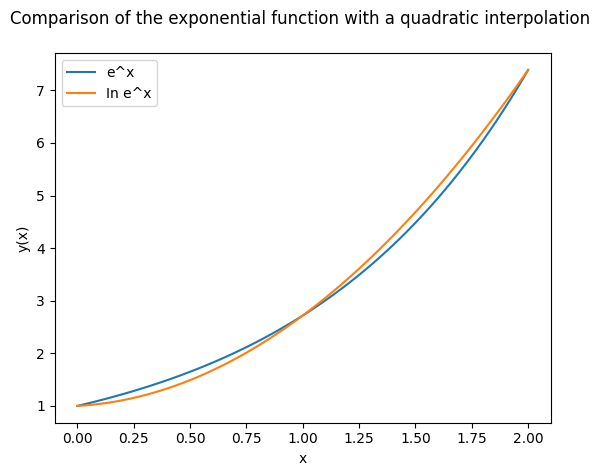

In [19]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y, label = 'e^x')
ax.plot(x,y_th, label = 'In e^x')
ax.set(ylabel = 'y(x)', xlabel = 'x', title='Comparison of the exponential function with a quadratic interpolation \n')
ax.legend()

## Pointwise error

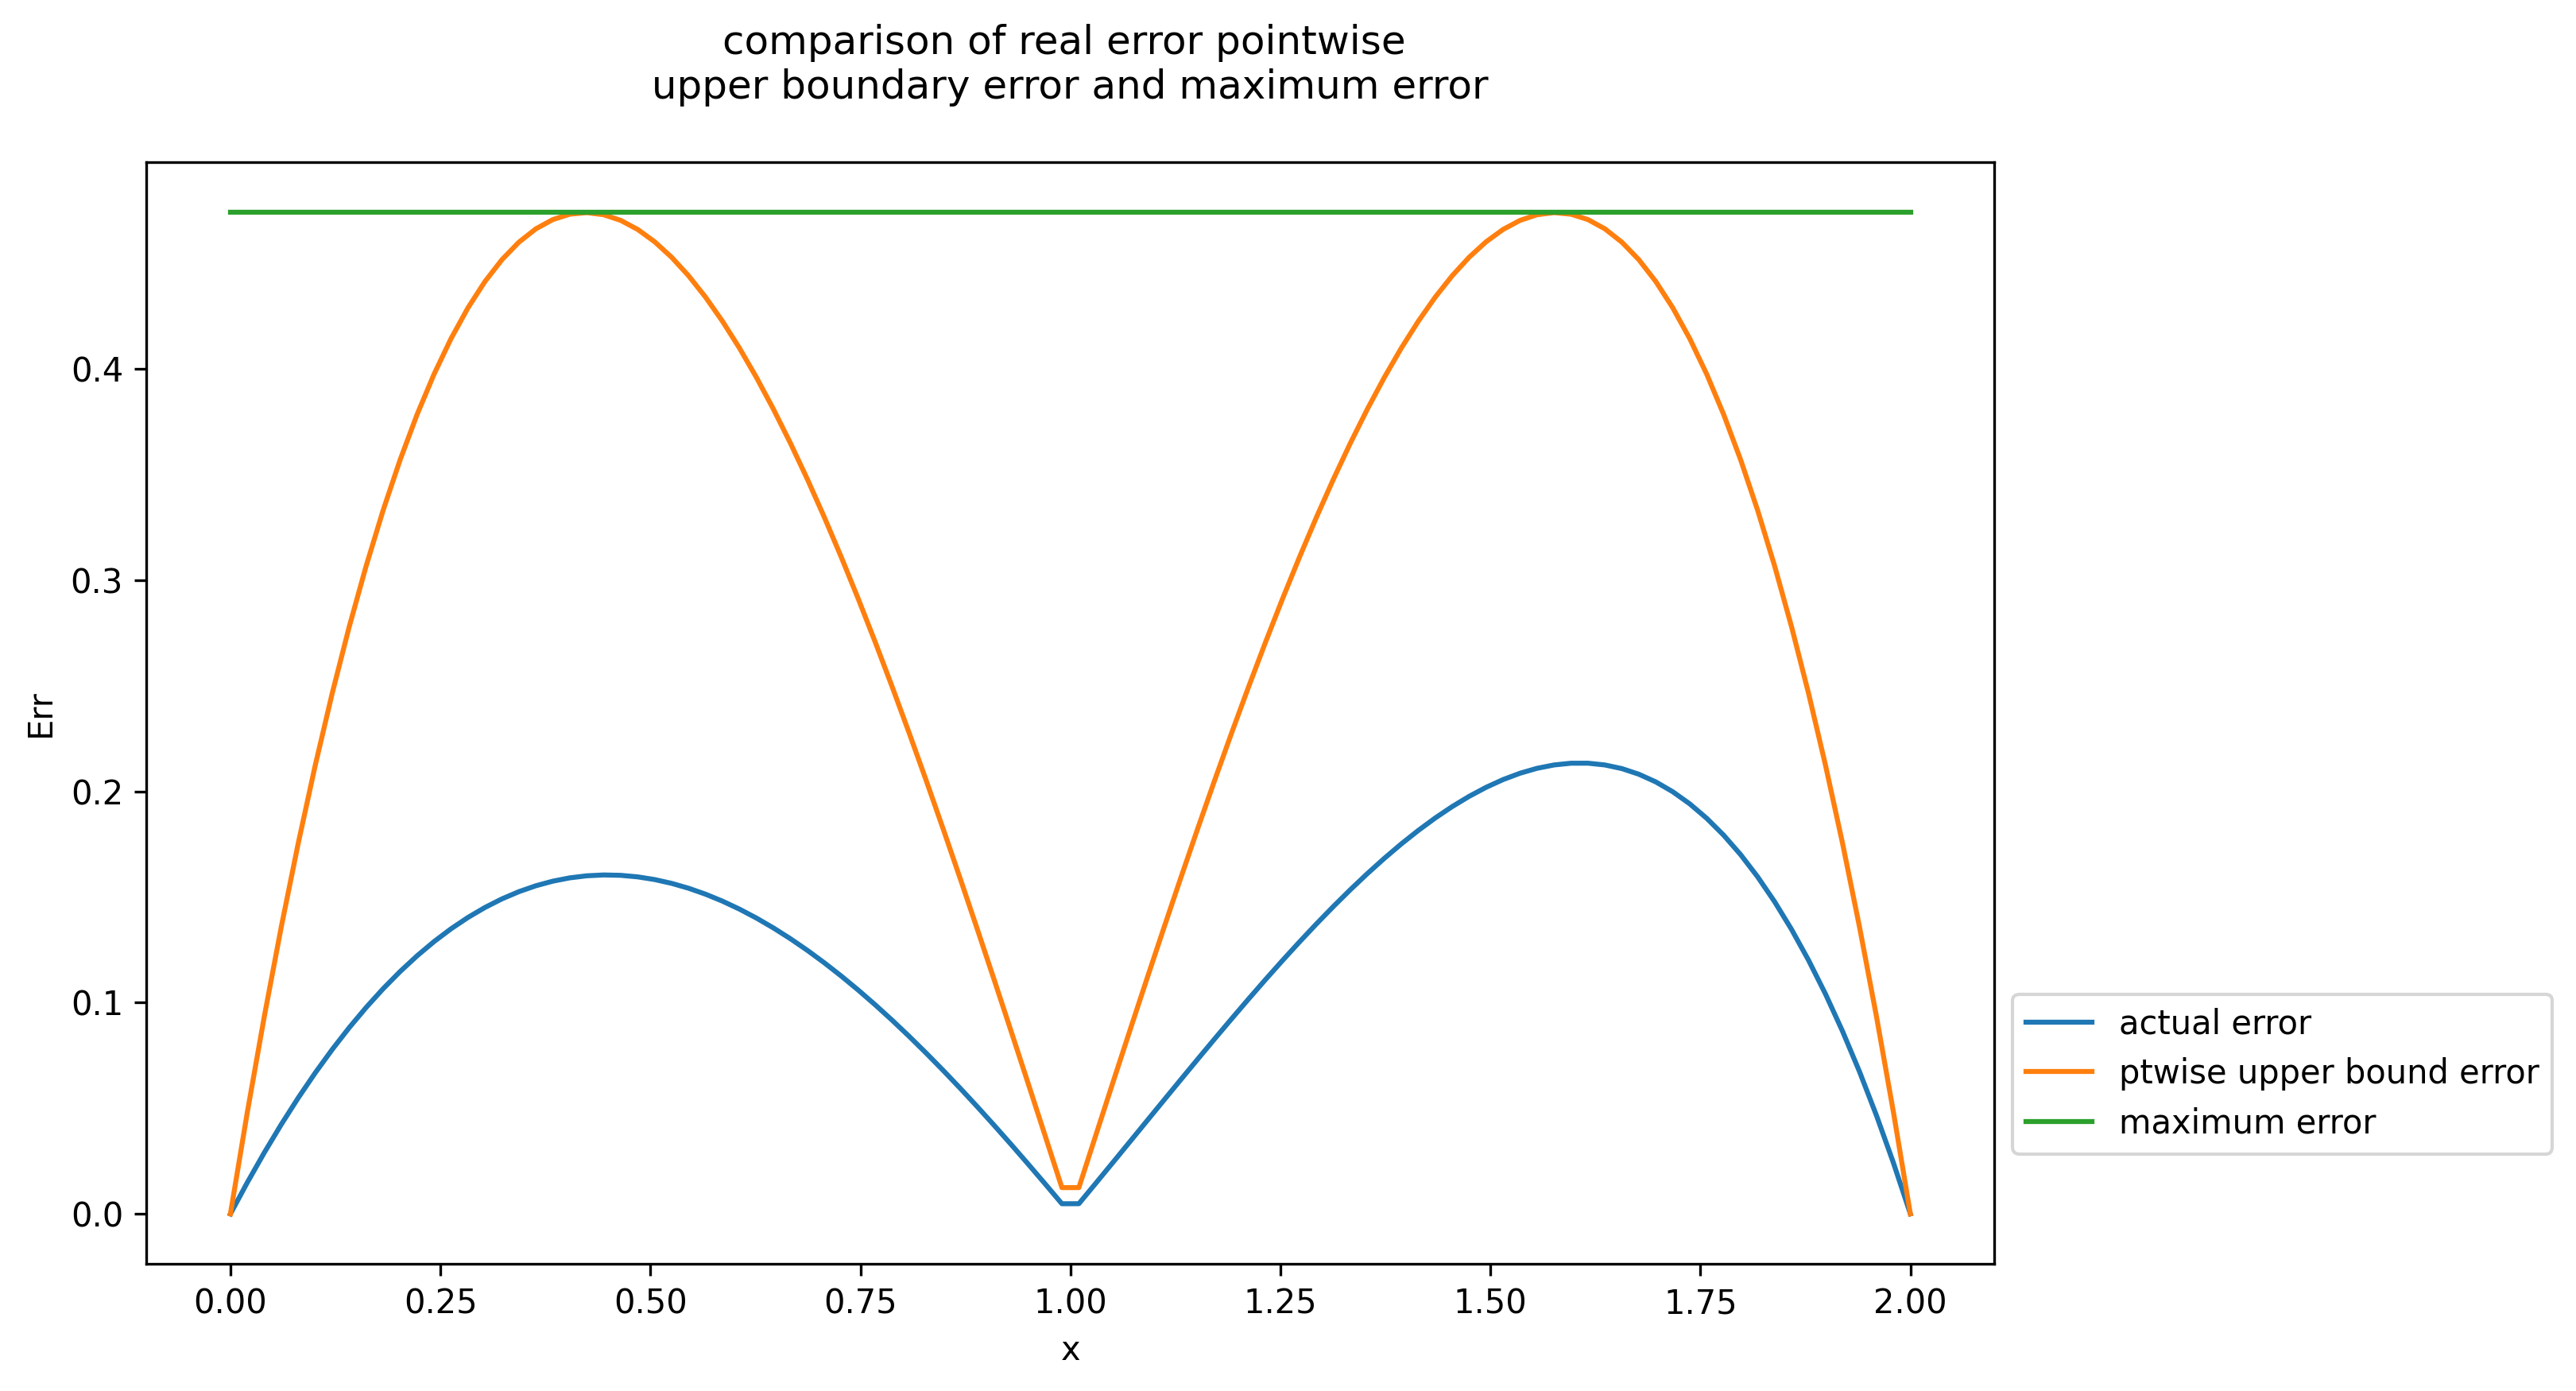

In [23]:
pointwise_error = abs(np.exp(2)*w_3(x)/6) # Based on |f-p|<= |w_3(x)| * |f'''(ξ)| / 6

maximum_error = np.full(100,0.385*np.exp(2)/6) # max of the pointwise error. We can calc by asking w'(x)=0

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x,abs(y_th-y), label='actual error')
ax.plot(x, pointwise_error, label = 'ptwise upper bound error')
ax.plot(x, maximum_error, label='maximum error')
ax.set(xlabel='x', ylabel='Err', title='comparison of real error pointwise \n upper boundary error and maximum error \n')
ax.legend(loc=(1.01,0.1))